<a href="https://colab.research.google.com/github/faloabdo/Demo/blob/main/draft4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Health Indicators

In [6]:
#imports
import os
import pandas as pd
import numpy as np
import random
random.seed(1)
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/AI4ALL'


In [9]:
if 'kaggle' not in os.listdir('/usr/local/bin'):
    !pip install kaggle --quiet

In [10]:
os.chdir('/content/drive/MyDrive/AI4ALL')
if 'diabetes-health-indicators-dataset.zip' not in os.listdir():
    !kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

In [11]:
if not os.path.exists('diabetes_012_health_indicators_BRFSS2015.csv'):
    !unzip diabetes-health-indicators-dataset.zip


# New Section

In [12]:
!ls

diabetes_012_health_indicators_BRFSS2015.csv
diabetes_binary_5050split_health_indicators_BRFSS2015.csv
diabetes_binary_health_indicators_BRFSS2015.csv
diabetes-health-indicators-dataset.zip
kaggle.json


In [13]:
df_diabetes = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

In [14]:
df_diabetes.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [15]:
df_diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [16]:
print(df_diabetes.isnull().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [17]:
for col in df_diabetes.columns:
    if col != 'Diabetes_binary':
        ct = pd.crosstab(df_diabetes[col], df_diabetes['Diabetes_binary'], normalize='index') * 100
        print(f"\nDiabetes % by {col}:")
        display(ct.style.background_gradient(cmap='Blues'))


Diabetes % by HighBP:


Diabetes_binary,0.000000,1.000000
HighBP,,
0.000000,71.672067,28.327933
1.000000,33.209480,66.790520



Diabetes % by HighChol:


Diabetes_binary,0.000000,1.000000
HighChol,,
0.000000,65.224134,34.775866
1.000000,36.264564,63.735436



Diabetes % by CholCheck:


Diabetes_binary,0.000000,1.000000
CholCheck,,
0.000000,86.220698,13.779302
1.000000,49.081125,50.918875



Diabetes % by BMI:


Diabetes_binary,0.000000,1.000000
BMI,,
12.000000,100.000000,0.000000
13.000000,75.000000,25.000000
14.000000,50.000000,50.000000
15.000000,60.000000,40.000000
16.000000,71.428571,28.571429
17.000000,71.764706,28.235294
18.000000,77.322404,22.677596
19.000000,80.463097,19.536903
20.000000,80.812102,19.187898



Diabetes % by Smoker:


Diabetes_binary,0.000000,1.000000
Smoker,,
0.000000,54.092306,45.907694
1.000000,45.481874,54.518126



Diabetes % by Stroke:


Diabetes_binary,0.000000,1.000000
Stroke,,
0.000000,51.614704,48.385296
1.000000,25.642776,74.357224



Diabetes % by HeartDiseaseorAttack:


Diabetes_binary,0.000000,1.000000
HeartDiseaseorAttack,,
0.000000,54.404661,45.595339
1.000000,24.605225,75.394775



Diabetes % by PhysActivity:


Diabetes_binary,0.000000,1.000000
PhysActivity,,
0.000000,37.793550,62.206450
1.000000,55.156039,44.843961



Diabetes % by Fruits:


Diabetes_binary,0.000000,1.000000
Fruits,,
0.000000,46.605692,53.394308
1.000000,52.153807,47.846193



Diabetes % by Veggies:


Diabetes_binary,0.000000,1.000000
Veggies,,
0.000000,42.338602,57.661398
1.000000,52.051650,47.948350



Diabetes % by HvyAlcoholConsump:


Diabetes_binary,0.000000,1.000000
HvyAlcoholConsump,,
0.000000,48.998109,51.001891
1.000000,72.450331,27.549669



Diabetes % by AnyHealthcare:


Diabetes_binary,0.000000,1.000000
AnyHealthcare,,
0.000000,55.339196,44.660804
1.000000,49.748178,50.251822



Diabetes % by NoDocbcCost:


Diabetes_binary,0.000000,1.000000
NoDocbcCost,,
0.000000,50.659610,49.340390
1.000000,43.636090,56.363910



Diabetes % by GenHlth:


Diabetes_binary,0.000000,1.000000
GenHlth,,
1.000000,86.235209,13.764791
2.000000,67.889493,32.110507
3.000000,42.557733,57.442267
4.000000,26.407577,73.592423
5.000000,21.177686,78.822314



Diabetes % by MentHlth:


Diabetes_binary,0.000000,1.000000
MentHlth,,
0.000000,51.336009,48.663991
1.000000,60.409556,39.590444
2.000000,53.841445,46.158555
3.000000,53.024911,46.975089
4.000000,50.152905,49.847095
5.000000,51.448988,48.551012
6.000000,43.055556,56.944444
7.000000,50.909091,49.090909
8.000000,44.444444,55.555556



Diabetes % by PhysHlth:


Diabetes_binary,0.000000,1.000000
PhysHlth,,
0.000000,58.060879,41.939121
1.000000,58.359621,41.640379
2.000000,50.560702,49.439298
3.000000,47.128794,52.871206
4.000000,44.549419,55.450581
5.000000,43.653516,56.346484
6.000000,36.912752,63.087248
7.000000,43.966817,56.033183
8.000000,42.391304,57.608696



Diabetes % by DiffWalk:


Diabetes_binary,0.000000,1.000000
DiffWalk,,
0.000000,57.927914,42.072086
1.000000,26.558827,73.441173



Diabetes % by Sex:


Diabetes_binary,0.000000,1.000000
Sex,,
0.000000,52.037201,47.962799
1.000000,47.579397,52.420603



Diabetes % by Age:


Diabetes_binary,0.000000,1.000000
Age,,
1.000000,92.032686,7.967314
2.000000,89.971347,10.028653
3.000000,84.675451,15.324549
4.000000,77.586824,22.413176
5.000000,70.142045,29.857955
6.000000,62.521515,37.478485
7.000000,55.064028,44.935972
8.000000,50.447518,49.552482
9.000000,43.304984,56.695016



Diabetes % by Education:


Diabetes_binary,0.000000,1.000000
Education,,
1.000000,37.333333,62.666667
2.000000,28.172435,71.827565
3.000000,33.391355,66.608645
4.000000,43.172598,56.827402
5.000000,48.307539,51.692461
6.000000,60.030746,39.969254



Diabetes % by Income:


Diabetes_binary,0.000000,1.000000
Income,,
1.000000,34.007200,65.992800
2.000000,31.391730,68.608270
3.000000,35.792694,64.207306
4.000000,39.110844,60.889156
5.000000,43.770287,56.229713
6.000000,48.566151,51.433849
7.000000,53.916849,46.083151
8.000000,65.150635,34.849365


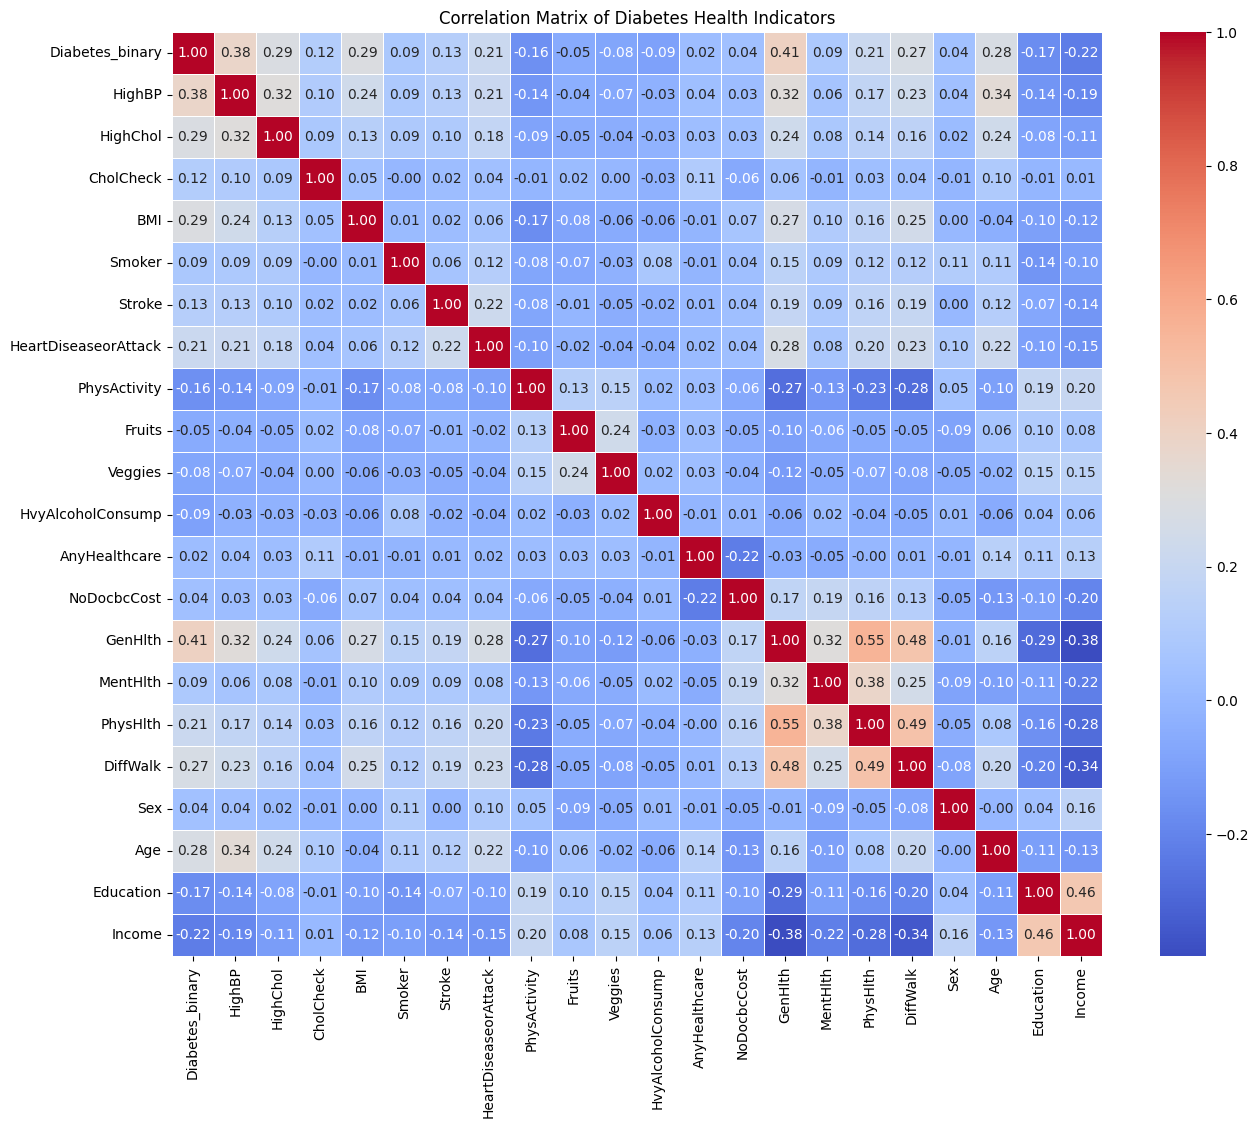


Top 10 Factors Correlated with Diabetes:


,Diabetes_binary
GenHlth,0.407612
HighBP,0.381516
BMI,0.293373
HighChol,0.289213
Age,0.278738
DiffWalk,0.272646
PhysHlth,0.213081
HeartDiseaseorAttack,0.211523
Stroke,0.125427
CholCheck,0.115382


In [18]:
correlation_matrix = df_diabetes.corr()

# heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Diabetes Health Indicators')
plt.show()

corr_with_diabetes = df_diabetes.corr()[['Diabetes_binary']].sort_values(
    by='Diabetes_binary', ascending=False)

print("\nTop 10 Factors Correlated with Diabetes:")
display(corr_with_diabetes.iloc[1:11])

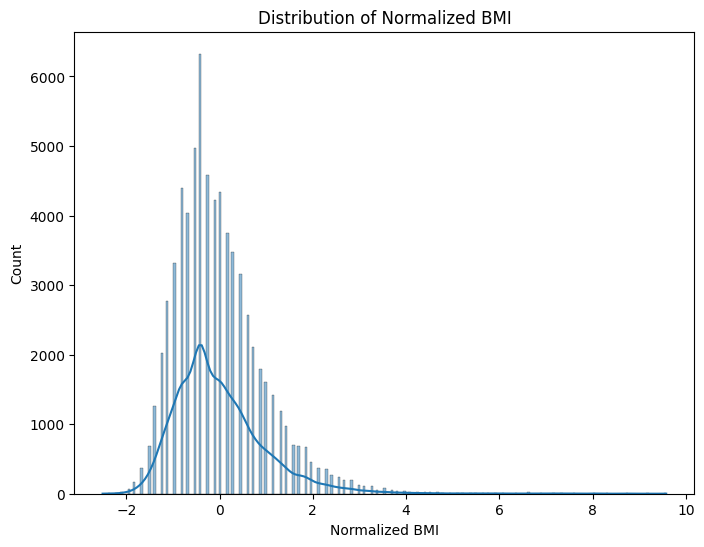

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_diabetes['BMI'] = scaler.fit_transform(df_diabetes[['BMI']])

plt.figure(figsize=(8, 6))
sns.histplot(df_diabetes['BMI'], kde=True)
plt.title('Distribution of Normalized BMI')
plt.xlabel('Normalized BMI')
plt.ylabel('Count')
plt.show()

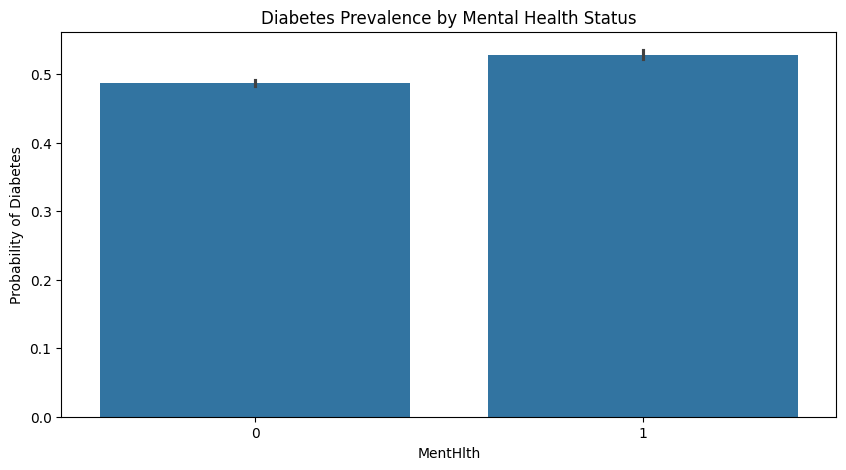

In [20]:
df_diabetes['MentHlth'] = df_diabetes['MentHlth'].apply(lambda x: 0 if x == 0 else 1)

plt.figure(figsize=(10, 5))
sns.barplot(x='MentHlth', y='Diabetes_binary', data=df_diabetes, estimator=np.mean)
plt.title('Diabetes Prevalence by Mental Health Status')
plt.ylabel('Probability of Diabetes')
plt.show()

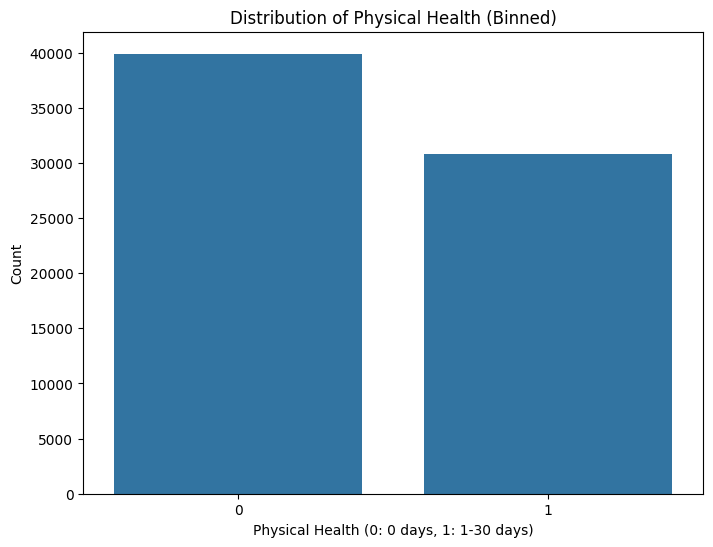

In [21]:
df_diabetes['PhysHlth'] = df_diabetes['PhysHlth'].apply(lambda x: 0 if x == 0 else 1)

plt.figure(figsize=(8, 6))
sns.countplot(x='PhysHlth', data=df_diabetes)
plt.title('Distribution of Physical Health (Binned)')
plt.xlabel('Physical Health (0: 0 days, 1: 1-30 days)')
plt.ylabel('Count')
plt.show()

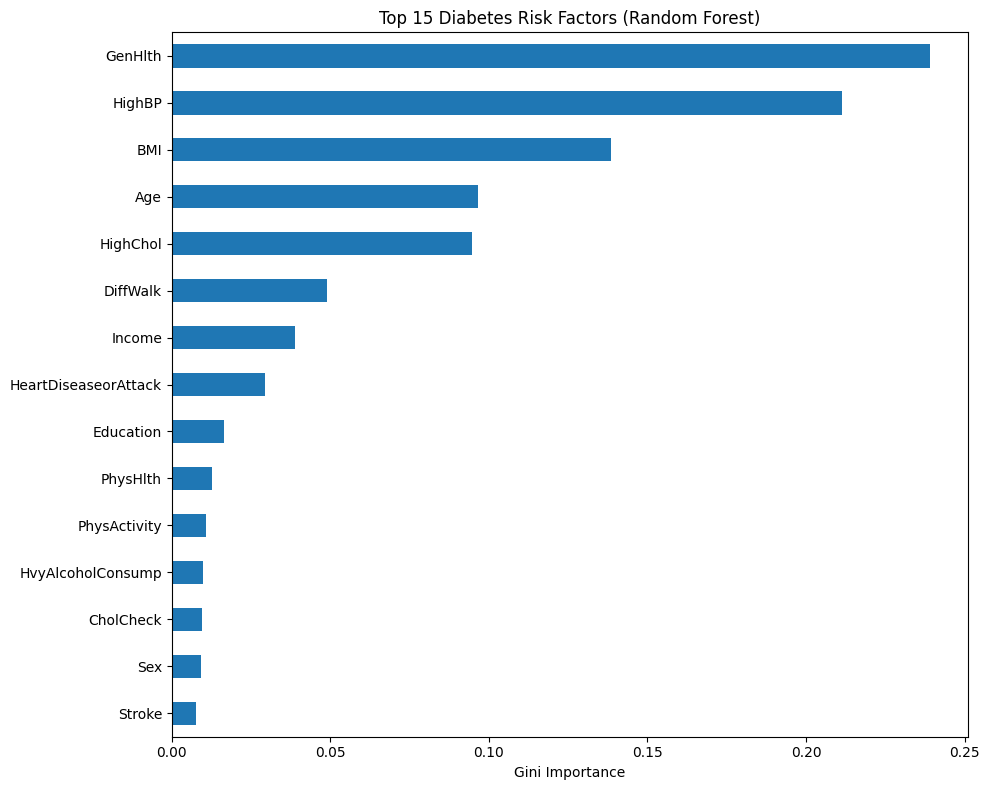


=== Final Model Performance ===
Accuracy: 0.749
ROC AUC: 0.827

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7070
         1.0       0.73      0.80      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



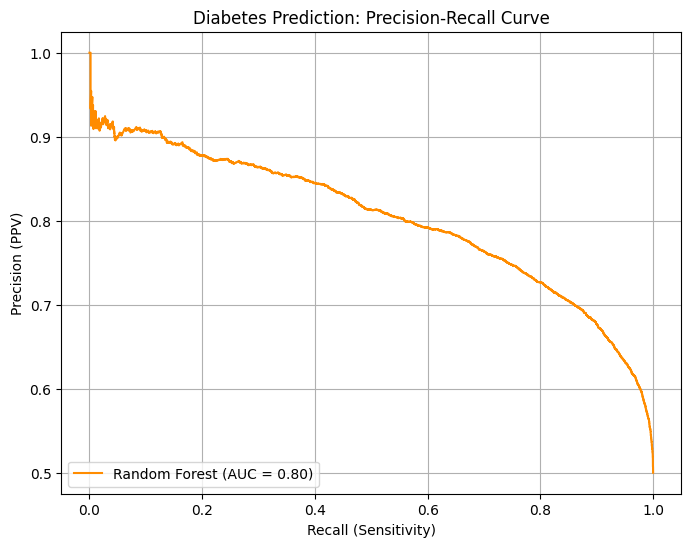

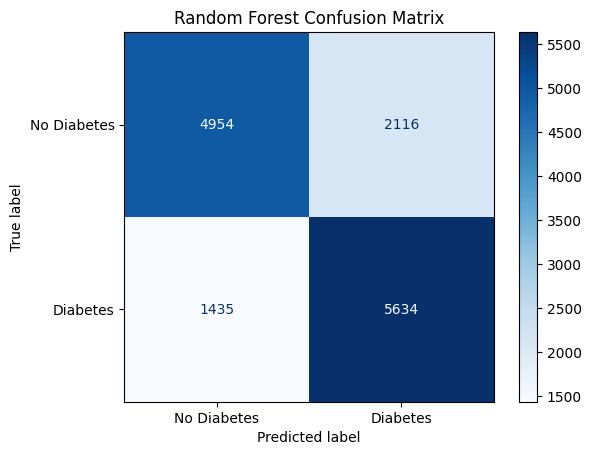

In [35]:
# FIXED AND ENHANCED RANDOM FOREST IMPLEMENTATION
from sklearn.metrics import auc  # Added missing import
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (accuracy_score, classification_report,
                           roc_auc_score, precision_recall_curve)
import matplotlib.pyplot as plt
import pandas as pd

# Data splitting (repeating for completeness)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Optimized Random Forest with best parameters
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# Train final model
best_rf.fit(X_train, y_train)

# Feature importance visualization
plt.figure(figsize=(10,8))
pd.Series(best_rf.feature_importances_, index=X.columns)\
  .nlargest(15)\
  .sort_values()\
  .plot(kind='barh')
plt.title("Top 15 Diabetes Risk Factors (Random Forest)")
plt.xlabel("Gini Importance")
plt.tight_layout()
plt.show()

# Final evaluation
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:,1]

print("\n=== Final Model Performance ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Enhanced Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)  # Now using the imported auc function

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='darkorange',
        label=f'Random Forest (AUC = {pr_auc:.2f})')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision (PPV)')
plt.title('Diabetes Prediction: Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Confusion Matrix (added)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test,
                                    cmap='Blues',
                                    display_labels=['No Diabetes', 'Diabetes'])
plt.title('Random Forest Confusion Matrix')
plt.show()

Cross-Validated ROC AUC: 0.825 ± 0.003

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


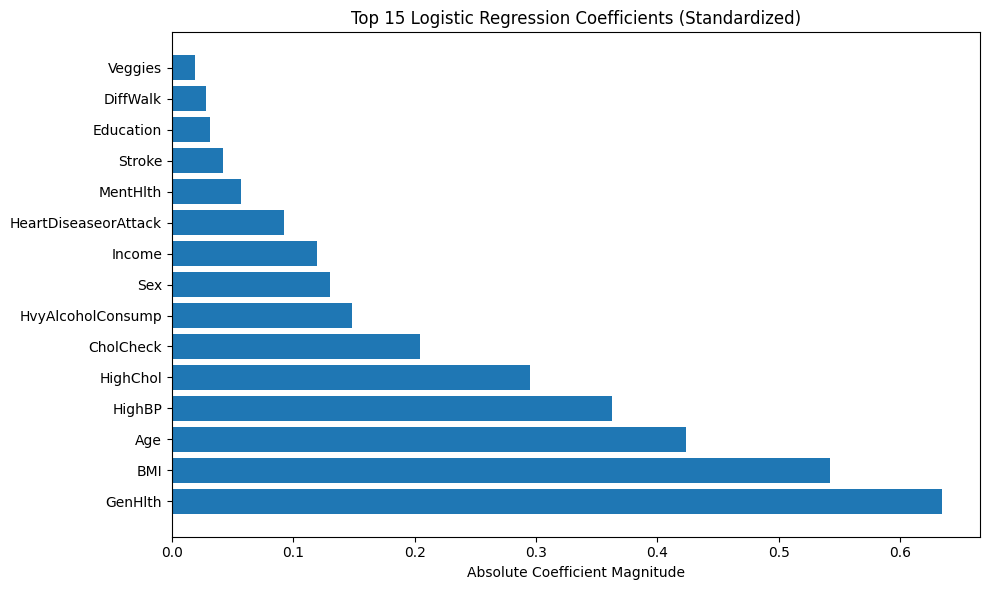


Test Set Performance:
Accuracy: 0.746
ROC AUC: 0.823

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74      7070
         1.0       0.74      0.76      0.75      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



<Figure size 800x600 with 0 Axes>

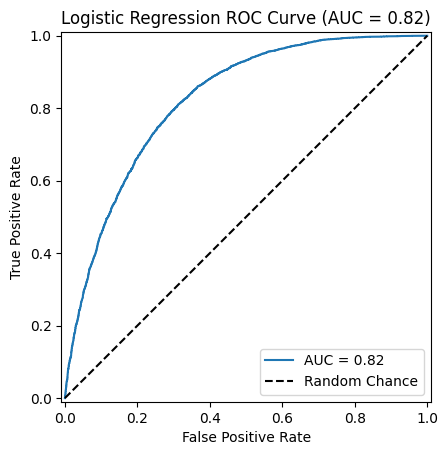

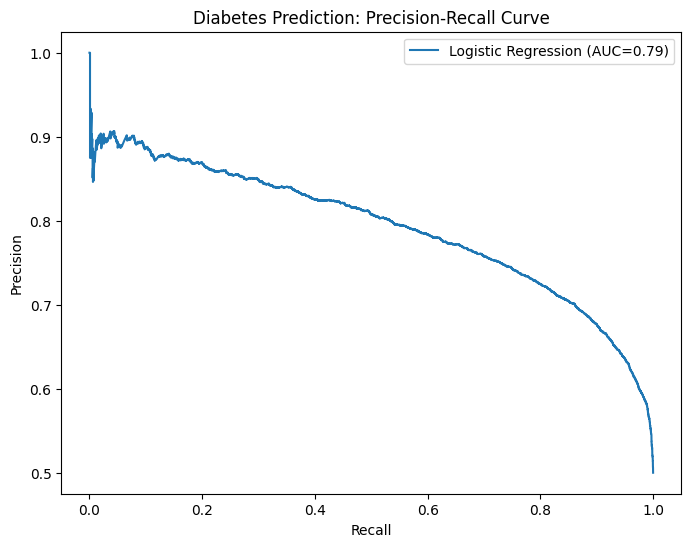

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler  # Added for proper scaling

# Feature scaling (critical for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimized logistic regression
lr = LogisticRegression(
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    solver='liblinear',  # Better for smaller datasets
    penalty='l2',  # Regularization
    max_iter=1000,
    C=0.1  # Added regularization strength
)

# Cross-validated performance
lr_cv_scores = cross_val_score(lr, X_train_scaled, y_train,
                             cv=5, scoring='roc_auc')
print(f"Cross-Validated ROC AUC: {lr_cv_scores.mean():.3f} ± {lr_cv_scores.std():.3f}")

# Hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
lr_grid.fit(X_train_scaled, y_train)

# Best model evaluation
best_lr = lr_grid.best_estimator_
print(f"\nBest Parameters: {lr_grid.best_params_}")

# Feature importance (using standardized coefficients)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': best_lr.coef_[0],
    'Abs_Coefficient': np.abs(best_lr.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
plt.barh(coef_df['Feature'].head(15), coef_df['Abs_Coefficient'].head(15))
plt.title("Top 15 Logistic Regression Coefficients (Standardized)")
plt.xlabel("Absolute Coefficient Magnitude")
plt.tight_layout()
plt.show()

# Final evaluation
y_pred_lr = best_lr.predict(X_test_scaled)
y_proba_lr = best_lr.predict_proba(X_test_scaled)[:, 1]

print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba_lr):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Enhanced ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc = roc_auc_score(y_test, y_proba_lr)

plt.figure(figsize=(8,6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title(f'Logistic Regression ROC Curve (AUC = {roc_auc:.2f})')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve (better for imbalanced data)
precision, recall, _ = precision_recall_curve(y_test, y_proba_lr)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'Logistic Regression (AUC={auc(recall, precision):.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Diabetes Prediction: Precision-Recall Curve')
plt.legend()
plt.show()

In [36]:
# Get non-zero coefficients from L1 regularization
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': best_lr.coef_[0]})
print(coef_df[coef_df['Coefficient'] != 0].sort_values('Coefficient', ascending=False).head(4))

    Feature  Coefficient
13  GenHlth     0.634154
3       BMI     0.542672
18      Age     0.423983
0    HighBP     0.363044


In [37]:
pd.Series(best_rf.feature_importances_, index=X.columns).nlargest(4)

,0
GenHlth,0.239129
HighBP,0.211415
BMI,0.138563
Age,0.096569


In [31]:
!pip install fairlearn


=== Sex Fairness ===
        accuracy  selection_rate       tpr       fpr
Sex                                                 
Female  0.756221        0.490684  0.756150  0.243712
Male    0.734220        0.550743  0.773294  0.308339

Demographic Parity Difference: 0.060
Equalized Odds Difference: 0.065


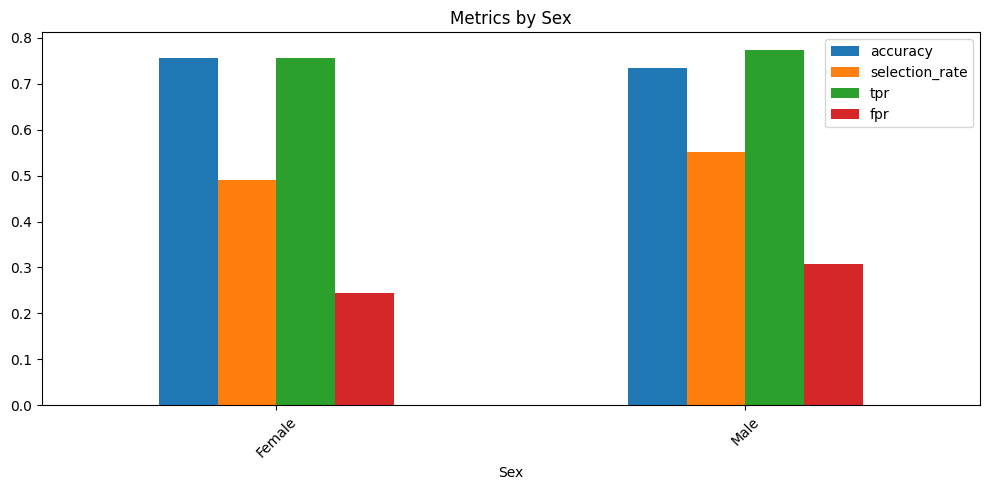


=== Age_Group Fairness ===
           accuracy  selection_rate       tpr       fpr
Age_Group                                              
18-34      0.821511        0.161335  0.460215  0.079196
35-59      0.747998        0.514560  0.753752  0.258170
60+        0.698663        0.731818  0.844017  0.544286

Demographic Parity Difference: 0.570
Equalized Odds Difference: 0.465


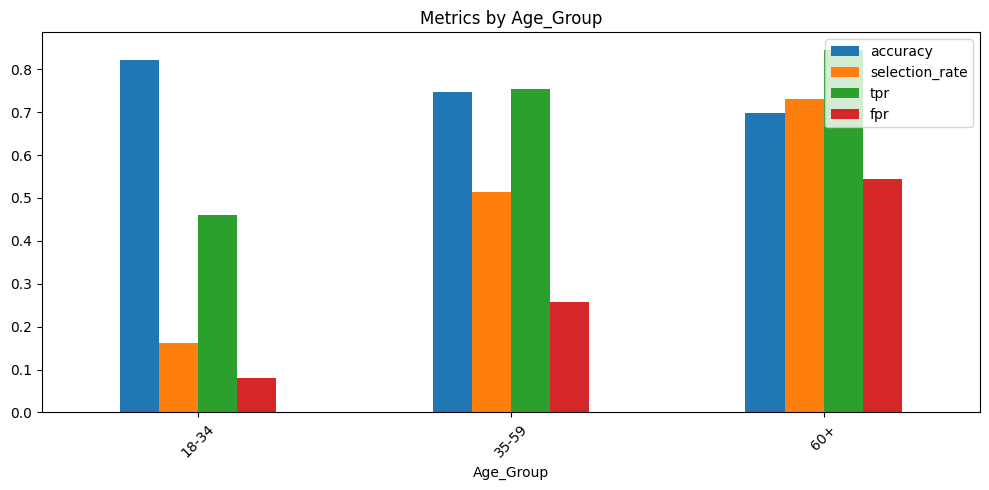


=== Income_Level Fairness ===
              accuracy  selection_rate       tpr       fpr
Income_Level                                              
High          0.758469        0.354026  0.647156  0.172660
Low           0.754806        0.753355  0.880500  0.497817
Medium        0.725919        0.596226  0.789436  0.353784

Demographic Parity Difference: 0.399
Equalized Odds Difference: 0.325


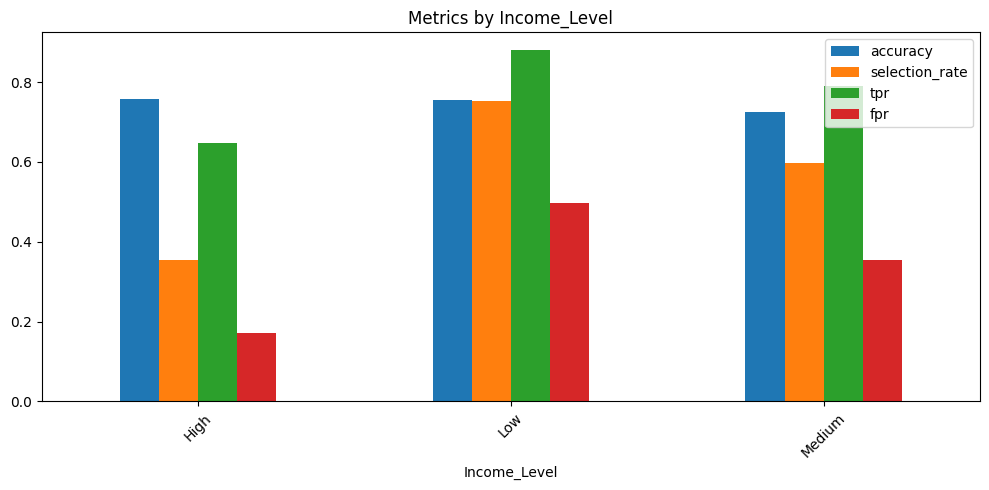

In [30]:
from fairlearn.metrics import (demographic_parity_difference,
                             equalized_odds_difference,
                             MetricFrame)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score,
                           classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data Preparation
X = df_diabetes.drop('Diabetes_binary', axis=1)
y = df_diabetes['Diabetes_binary']

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
lr_model = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs',
                            max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_model.predict(X_test_scaled)
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Prepare sensitive features (simplified)
sensitive_features = X_test[['Sex', 'Age', 'Income']].copy()
sensitive_features['Sex'] = sensitive_features['Sex'].map({0: 'Female', 1: 'Male'})
sensitive_features['Age_Group'] = pd.cut(sensitive_features['Age'],
                                       bins=[0, 5, 10, 15],
                                       labels=['18-34', '35-59', '60+'])
sensitive_features['Income_Level'] = pd.cut(sensitive_features['Income'],
                                          bins=[0, 3, 6, 9],
                                          labels=['Low', 'Medium', 'High'])

# Consolidated Fairness Analysis
def analyze_fairness(sensitive_col):
    metrics = {
        'accuracy': accuracy_score,
        'selection_rate': selection_rate,
        'tpr': true_positive_rate,
        'fpr': false_positive_rate
    }

    mf = MetricFrame(metrics=metrics,
                    y_true=y_test,
                    y_pred=y_pred,
                    sensitive_features=sensitive_features[sensitive_col])

    # Print key metrics
    print(f"\n=== {sensitive_col} Fairness ===")
    print(mf.by_group)

    # Calculate fairness metrics
    dp_diff = demographic_parity_difference(y_test, y_pred,
                                          sensitive_features=sensitive_features[sensitive_col])
    eo_diff = equalized_odds_difference(y_test, y_pred,
                                      sensitive_features=sensitive_features[sensitive_col])

    print(f"\nDemographic Parity Difference: {dp_diff:.3f}")
    print(f"Equalized Odds Difference: {eo_diff:.3f}")

    # Visualize
    mf.by_group.plot(kind='bar', figsize=(10, 5))
    plt.title(f'Metrics by {sensitive_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return dp_diff, eo_diff

# Run analysis
for group in ['Sex', 'Age_Group', 'Income_Level']:
    analyze_fairness(group)

